<a href="https://colab.research.google.com/github/kanishk16/hgRecog/blob/master/handy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow

# version check
cv.__version__

'3.4.3'

In [2]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://pythonprogramming.net/static/images/opencv/bookpage.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png
# https://github.com/vishwajeetsinghrana8/OpenCV/blob/master/Hand_Gesture/Capture.png?raw=true

URL: https://github.com/vishwajeetsinghrana8/OpenCV/blob/master/Hand_Gesture/Capture.png?raw=true
File Name: hand_ges


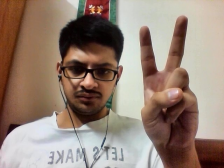

In [69]:
# load an img
# img1 = cv.imread('hand_ges.jpg', 1)
img1 = cv.imread('hand-2.JPG', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, None, None, 0.35, 0.35, interpolation = cv.INTER_AREA)
# imgr2 = cv.resize(img2, None, None, 0.35, 0.35, interpolation = cv.INTER_AREA)

cv_imshow(imgr1)
# cv_imshow(imgr2)


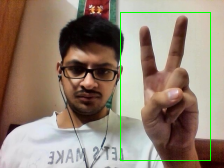

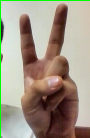

In [97]:
# create a window
window_imgr1 = cv.rectangle(imgr1.copy(), (120,12), (210,160), (0,255,0))
cv_imshow(window_imgr1)

# extract hand from the sub-window: crop_img = img[h1:h2, w1:w2]
crop_imgr1 = window_imgr1[12:150, 120:210]
cv_imshow(crop_imgr1)

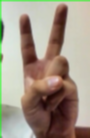

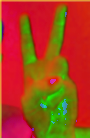

In [98]:
# blur
blur_imgr1 = cv.GaussianBlur(crop_imgr1, (3,3), 0)
cv_imshow(blur_imgr1)

# converting it to hsv
hsv_imgr1 = cv.cvtColor(blur_imgr1, cv.COLOR_BGR2HSV)
cv_imshow(hsv_imgr1)

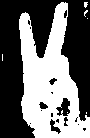

In [99]:
# define the lower n upper bound for color
lower_skin = np.array([2,0,0])
upper_skin = np.array([15,255,255])

# checks if arg_2 < img.(arg_1)elements < arg_3 and sets each of them in the range to 1 rest to 0   
mask = cv.inRange(hsv_imgr1, lower_skin, upper_skin)
cv_imshow(mask)

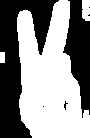

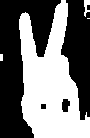

In [100]:
# morphological transformation
kernel = np.ones((5,5), np.uint8)

# dilation - px 0/1 1:atleast one px under the kernel is 1
dilation_imgr1 = cv.dilate(mask, kernel, iterations = 1)
cv_imshow(dilation_imgr1)

# erosion - px 0/1 1:all the px under the kernel are 1
erosion_imgr1 = cv.erode(dilation_imgr1, kernel, iterations = 1)
cv_imshow(erosion_imgr1)

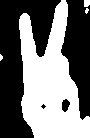

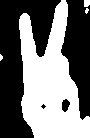

In [101]:
# median filtering
median_imgr1 = cv.medianBlur(erosion_imgr1, 5)
cv_imshow(median_imgr1)

# thresholding
retval, threshold = cv.threshold(median_imgr1, 70, 255, cv.THRESH_BINARY)
cv_imshow(threshold)

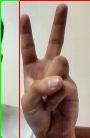

In [102]:
# find contours
_, contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# find contour with max. area
contour = max(contours, key = lambda x: cv.contourArea(x))

# creating a bounding rectangle around the contour
x, y, w, h = cv.boundingRect(contour)
crec_imgr1 = cv.rectangle(crop_imgr1, (x,y), (x+w,y+h), (0,0,255))
cv_imshow(crec_imgr1)

[[[ 89 137]]

 [[ 34 137]]

 [[ 24 119]]

 [[ 23 117]]

 [[ 22 112]]

 [[ 21 105]]

 [[ 19  29]]

 [[ 19  19]]

 [[ 20  16]]

 [[ 23  13]]

 [[ 61   0]]

 [[ 65   0]]

 [[ 67   4]]

 [[ 89 117]]]


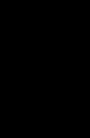

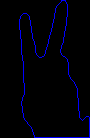

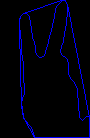

In [103]:
# find convex hull for drawing the contour
hull = cv.convexHull(contour)
print(hull)

# draw the contour on a black background
draw = np.zeros(crop_imgr1.shape, np.uint8)
cv_imshow(draw)

contour_imgr1 = cv.drawContours(draw, [contour], -1, (255,0,0), 0)
cv_imshow(contour_imgr1)

hull_imgr1 = cv.drawContours(draw, [hull], -1, (255,0,0), 0)
cv_imshow(contour_imgr1)

In [104]:
# find convexity defects
defect_hull = cv.convexHull(contour, returnPoints = False)

defects = cv.convexityDefects(contour, defect_hull)
print(defects)

[[[   87   130   115  4107]]

 [[  130   134   131   114]]

 [[    0    49    30 12149]]

 [[   50    52    51   162]]

 [[   53    69    62   916]]

 [[   69    71    70   217]]

 [[   71    73    72   201]]

 [[   73    75    74   114]]

 [[   75    85    78   572]]]


In [105]:
import math

# cosine rule to find angle of the far point from the start n end point i.e. 
# the convex points (the finger tips) for all defects
count_defects = 0

for i in range(defects.shape[0]):
  s, e, f, d = defects[i,0]
  start = tuple(contour[s][0])
  end = tuple(contour[e][0])
  far = tuple(contour[f][0])

  a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
  b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
  c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
  angle = (math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 180) / 3.14


  # if angle > 90 draw a circle at the far point
  if angle <= 90:
    count_defects += 1
    cv.circle(crop_imgr1, far, 1, [0, 0, 255], -1)

  cv.line(crop_imgr1, start, end, [0, 255, 0], 2)

print('defects:',count_defects)  

defects: 1
